In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score





In [2]:
def split_test_train(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train,X_test,y_train,y_test

In [3]:
def standard_scaler(X_train,X_test):
    sc_X = StandardScaler()
    X_train_scale = sc_X.fit_transform(X_train)
    X_test_scale = sc_X.transform(X_test)
    return X_train_scale,X_test_scale


In [4]:
def univariate_selection(X_train,y_train):
    bestfeatures = SelectKBest(score_func=chi2, k=12)
    fit = bestfeatures.fit(X_train, y_train)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_train.columns)
    # concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
    newScore=featureScores.nlargest(12, 'Score')
    print(featureScores.nlargest(12, 'Score'))
    return newScore

In [5]:
def RFE_col(X_train,y_train,n):
    classifier = LogisticRegression(random_state=0)
    rfe = RFE(classifier, n)
    fit = rfe.fit(X_train, y_train)
    print("Num Features: %d" % fit.n_features_)
    print("Selected Features: %s" % fit.support_)
    print("Feature Ranking: %s" % fit.ranking_)
    list=fit.support_
    features=[]
    for i,value in enumerate(list):
        if value == True:
            features.append(i)
    rfe_rank = fit.ranking_
    return features

In [6]:
def PCA_col(X_train,y_train,n):
    pca_example=PCA().fit(X_train)
    print("Explained_variance_ratio")
    print(pca_example.explained_variance_ratio_)
    pca = PCA(n_components=n).fit(X_train)
    n_pcs = pca.components_.shape[0]
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
    initial_feature_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
                             '17']
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
    # using LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i + 1): most_important_names[i] for i in range(n_pcs)}
    # build the dataframe
    df = pd.DataFrame(sorted(dic.items()))
    print(df)
    return df

In [7]:
def decision_tree(X_train,y_train):
    model = ExtraTreesClassifier()
    model.fit(X_train, y_train)
    print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
    # plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(12).plot(kind='barh')
    print("Feature importance")
    print(feat_importances)
    plt.show()

In [8]:
#Logistic regression
def logistic_regression(X_train,y_train,X_test,y_test):
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_test, y_test, cv=10)
    print("SCORE:")
    print(score)
    print("Average score:")
    print(statistics.mean(score))

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

In [9]:
#Process data
def process_data(X,y):
    X_train, X_test, y_train, y_test = split_test_train(X, y)
    X_train_scale, X_test_scale = standard_scaler(X_train, X_test)
    logistic_regression(X_train_scale, y_train, X_test_scale, y_test)


In [10]:
if __name__ == "__main__":
    dataset = pd.read_csv("csv_result-diabetic_dataset.csv")

    # all col
    X = dataset.iloc[:, 1:19]
    y = dataset.iloc[:, 20]

    # random 4
    array = random.sample(range(0, 17), 4)
    X_random4 = dataset.iloc[:, [array[0], array[1], array[2], array[3]]]
    y_random4 = dataset.iloc[:, 20]

    # random 8

    array = random.sample(range(0, 17), 8)
    X_random8 = dataset.iloc[:, [array[0], array[1], array[2], array[3],array[4],array[5],array[6],array[7]]]
    y_random8 = dataset.iloc[:, 20]

    # random 12

    array = random.sample(range(0, 17), 12)
    X_random12 = dataset.iloc[:, [array[0], array[1], array[2], array[3],array[4],array[5],array[6],array[7],array[8],array[9],array[10],array[11]]]
    y_random12 = dataset.iloc[:, 20]

    

In [11]:
X_train, X_test, y_train, y_test=split_test_train(X,y)

In [12]:
score_us=univariate_selection(X_train, y_train)

   Specs        Score
2      2  1168.652004
3      3   865.132954
4      4   605.807421
8      8   468.984167
5      5   376.976821
6      6   228.990474
12    12   169.302234
7      7   109.621927
13    13    89.074663
11    11    79.627238
10    10    64.765217
14    14    48.298925


In [47]:


    # Univariate Selection
    X_unvariate_selection_4 = dataset.iloc[:,[2,3,4,8] ]
    y_unvariate_selection_4 = dataset.iloc[:, 20]

    X_unvariate_selection_8 = dataset.iloc[:,[2,3,4,8,5,6,12,7]]
    y_unvariate_selection_8 = dataset.iloc[:, 20]

    X_unvariate_selection_12 = dataset.iloc[:,
                              [2,3,4,8,5,6,12,7,13,11,10,14]]
    y_unvariate_selection_12 = dataset.iloc[:, 20]

In [48]:
 X_train_scale,X_test_scale=standard_scaler(X_train,X_test)

In [49]:
score_rfe_4=RFE_col(X_train_scale,y_train,4)

Num Features: 4
Selected Features: [False False  True False  True  True False False False False False False
 False False  True False False False]
Feature Ranking: [14 12  1  3  1  1  2  6  9 10 11  8  7  4  1  5 15 13]


In [50]:
score_rfe_8=RFE_col(X_train_scale, y_train, 8)

Num Features: 8
Selected Features: [False False  True  True  True  True  True False False False False False
 False  True  True  True False False]
Feature Ranking: [10  8  1  1  1  1  1  2  5  6  7  4  3  1  1  1 11  9]


In [51]:
 score_rfe_12=RFE_col(X_train_scale, y_train, 12)   
    

Num Features: 12
Selected Features: [False False  True  True  True  True  True  True  True False False  True
  True  True  True  True False False]
Feature Ranking: [6 4 1 1 1 1 1 1 1 2 3 1 1 1 1 1 7 5]


In [52]:
    # RFE
    X_rfe_4 = dataset.iloc[:,[2,4,5,14]]
    y_rfe_4 = dataset.iloc[:, 20]

    X_rfe_8 = dataset.iloc[:, [2,3,4,5,6,13,14,15]]
    y_rfe_8 = dataset.iloc[:, 20]

    X_rfe_12 = dataset.iloc[:,[2,3,4,5,6,7,8,11,12,13,14,15]]
    y_rfe_12 = dataset.iloc[:, 20]

In [53]:
 score_pca_4=PCA_col(X_train_scale,y_train,4)


Explained_variance_ratio
[3.33837712e-01 2.68263892e-01 1.12688820e-01 6.38504110e-02
 5.73880210e-02 5.52166095e-02 4.33941000e-02 2.98601737e-02
 1.39789091e-02 8.78413332e-03 6.06536718e-03 2.85995132e-03
 1.38620998e-03 1.11792058e-03 8.63931839e-04 2.53024408e-04
 1.28048709e-04 6.27651455e-05]
     0   1
0  PC1   5
1  PC2  11
2  PC3   9
3  PC4  17


In [54]:
score_pca_8=PCA_col(X_train_scale, y_train, 8)


Explained_variance_ratio
[3.33837712e-01 2.68263892e-01 1.12688820e-01 6.38504110e-02
 5.73880210e-02 5.52166095e-02 4.33941000e-02 2.98601737e-02
 1.39789091e-02 8.78413332e-03 6.06536718e-03 2.85995132e-03
 1.38620998e-03 1.11792058e-03 8.63931839e-04 2.53024408e-04
 1.28048709e-04 6.27651455e-05]
     0   1
0  PC1   5
1  PC2  11
2  PC3   9
3  PC4  17
4  PC5   0
5  PC6   1
6  PC7  17
7  PC8  15


In [55]:
score_pca_12=PCA_col(X_train_scale, y_train, 12)

Explained_variance_ratio
[3.33837712e-01 2.68263892e-01 1.12688820e-01 6.38504110e-02
 5.73880210e-02 5.52166095e-02 4.33941000e-02 2.98601737e-02
 1.39789091e-02 8.78413332e-03 6.06536718e-03 2.85995132e-03
 1.38620998e-03 1.11792058e-03 8.63931839e-04 2.53024408e-04
 1.28048709e-04 6.27651455e-05]
       0   1
0    PC1   5
1   PC10   7
2   PC11   9
3   PC12  13
4    PC2  11
5    PC3   9
6    PC4  17
7    PC5   0
8    PC6   1
9    PC7  17
10   PC8  15
11   PC9   8


In [56]:
    # PCA
    X_PCA_4 = dataset.iloc[:, [5,11,9,17]]
    y_PCA_4 = dataset.iloc[:, 20]

    X_PCA_8 = dataset.iloc[:, [5,11,9,17,0,1,17,15]]
    y_PCA_8 = dataset.iloc[:, 20]

    X_PCA_12 = dataset.iloc[:, [5,7,9,13,11,9,17,0,1,17,15,8]]
    y_PCA_12 = dataset.iloc[:, 20]

[0.00024032 0.01518332 0.1040076  0.07350999 0.06371322 0.06356308
 0.06688888 0.0681039  0.07783556 0.0610071  0.05563318 0.0550945
 0.04733747 0.04080257 0.04935441 0.04095139 0.05703185 0.05974168]
Feature importance
0     0.000240
1     0.015183
2     0.104008
3     0.073510
4     0.063713
5     0.063563
6     0.066889
7     0.068104
8     0.077836
9     0.061007
10    0.055633
11    0.055094
12    0.047337
13    0.040803
14    0.049354
15    0.040951
16    0.057032
17    0.059742
dtype: float64


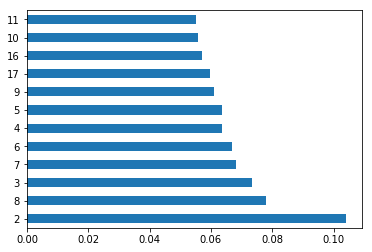

In [27]:
decision_tree(X_train_scale,y_train)

In [57]:
    # DecisionTree
    X_dt_4 = dataset.iloc[:, [2, 8, 3, 7]]
    y_dt_4 = dataset.iloc[:, 20]

    X_dt_8 = dataset.iloc[:, [2, 8, 3, 7,6,4,5,9]]
    y_dt_8 = dataset.iloc[:, 20]

    X_dt_12 = dataset.iloc[:, [2, 8, 3, 7,6,4,5,9,17,16,10,11]]
    y_dt_12 = dataset.iloc[:, 20]

In [58]:
    print("Sve kolone>>>>>>>>>")
    logistic_regression(X_train_scale,y_train,X_test_scale,y_test)

Sve kolone>>>>>>>>>
SCORE:
[0.79166667 0.60869565 0.69565217 0.52173913 0.65217391 0.82608696
 0.65217391 0.65217391 0.69565217 0.69565217]
Average score:
0.6791666666666667
Confusion Matrix:
[[95 25]
 [37 74]]


In [59]:
    print("Nasumicno izabrano 12 kolona>>>>>>")
    process_data(X_random12,y_random12)
   

Nasumicno izabrano 12 kolona>>>>>>
SCORE:
[0.83333333 0.73913043 0.73913043 0.60869565 0.43478261 0.7826087
 0.60869565 0.7826087  0.52173913 0.7826087 ]
Average score:
0.6833333333333333
Confusion Matrix:
[[86 27]
 [39 79]]


In [60]:
    print("Univariate Selection 12 kolona>>>>>>")
    process_data(X_unvariate_selection_12, y_unvariate_selection_12)

Univariate Selection 12 kolona>>>>>>
SCORE:
[0.66666667 0.69565217 0.65217391 0.69565217 0.7826087  0.60869565
 0.69565217 0.7826087  0.60869565 0.7826087 ]
Average score:
0.6971014492753623
Confusion Matrix:
[[97 20]
 [42 72]]


In [61]:
    print("RFE 12 kolona>>>>>>")
    process_data(X_rfe_12,y_rfe_12)
  

RFE 12 kolona>>>>>>
SCORE:
[0.66666667 0.52173913 0.69565217 0.7826087  0.69565217 0.7826087
 0.73913043 0.65217391 0.47826087 0.69565217]
Average score:
0.6710144927536232
Confusion Matrix:
[[78 15]
 [51 87]]


In [62]:
    print("PCA 12 kolona>>>>>>")
    process_data(X_PCA_12,y_PCA_12)
   

PCA 12 kolona>>>>>>
SCORE:
[0.66666667 0.60869565 0.69565217 0.65217391 0.7826087  0.60869565
 0.82608696 0.47826087 0.60869565 0.56521739]
Average score:
0.6492753623188405
Confusion Matrix:
[[80 37]
 [37 77]]


In [63]:
    print("Decision tree 12 kolona>>>>>")
    process_data(X_dt_12,y_dt_12)

Decision tree 12 kolona>>>>>
SCORE:
[0.54166667 0.47826087 0.7826087  0.86956522 0.34782609 0.69565217
 0.56521739 0.86956522 0.65217391 0.69565217]
Average score:
0.6498188405797102
Confusion Matrix:
[[88 21]
 [52 70]]


In [64]:
    print("Nasumicno izabrano 8 kolona>>>>>>")
    process_data(X_random8, y_random8)
 

Nasumicno izabrano 8 kolona>>>>>>
SCORE:
[0.29166667 0.82608696 0.47826087 0.86956522 0.52173913 0.7826087
 0.65217391 0.65217391 0.65217391 0.69565217]
Average score:
0.6422101449275363
Confusion Matrix:
[[84 16]
 [55 76]]


In [65]:
    print("Univariate Selection 8 kolona>>>>>>")
    process_data(X_unvariate_selection_8, y_unvariate_selection_8)
  

Univariate Selection 8 kolona>>>>>>
SCORE:
[0.95833333 0.56521739 0.65217391 0.65217391 0.65217391 0.73913043
 0.69565217 0.69565217 0.73913043 0.47826087]
Average score:
0.6827898550724638
Confusion Matrix:
[[87 19]
 [46 79]]


In [66]:
    print("RFE 8 kolona>>>>>>")
    process_data(X_rfe_8, y_rfe_8)
 

RFE 8 kolona>>>>>>
SCORE:
[0.58333333 0.86956522 0.73913043 0.7826087  0.86956522 0.65217391
 0.73913043 0.60869565 0.65217391 0.60869565]
Average score:
0.7105072463768116
Confusion Matrix:
[[85 17]
 [43 86]]


In [67]:
    print("PCA 8 kolona>>>>>>")
    process_data(X_PCA_8, y_PCA_8)
 

PCA 8 kolona>>>>>>
SCORE:
[0.79166667 0.69565217 0.56521739 0.69565217 0.56521739 0.47826087
 0.56521739 0.69565217 0.69565217 0.52173913]
Average score:
0.6269927536231884
Confusion Matrix:
[[63 49]
 [40 79]]


In [68]:
    print("Decision tree 8 kolona>>>>>")
    process_data(X_dt_8, y_dt_8)

Decision tree 8 kolona>>>>>
SCORE:
[0.79166667 0.69565217 0.60869565 0.56521739 0.60869565 0.65217391
 0.7826087  0.86956522 0.56521739 0.60869565]
Average score:
0.6748188405797102
Confusion Matrix:
[[92 28]
 [39 72]]


In [69]:
    print("Nasumicno izabrane 4 kolone>>>>>>")
    process_data(X_random4, y_random4)
 

Nasumicno izabrane 4 kolone>>>>>>
SCORE:
[0.54166667 0.65217391 0.60869565 0.52173913 0.73913043 0.56521739
 0.56521739 0.69565217 0.69565217 0.69565217]
Average score:
0.6280797101449275
Confusion Matrix:
[[79 32]
 [48 72]]


In [70]:
    print("Univariate Selection 4 kolone>>>>>>")
    process_data(X_unvariate_selection_4, y_unvariate_selection_4)


Univariate Selection 4 kolone>>>>>>
SCORE:
[0.66666667 0.52173913 0.73913043 0.73913043 0.73913043 0.60869565
 0.52173913 0.7826087  0.65217391 0.82608696]
Average score:
0.6797101449275362
Confusion Matrix:
[[79 30]
 [44 78]]


In [71]:
    print("RFE 4 kolone>>>>>>")
    process_data(X_rfe_4, y_rfe_4)
 

RFE 4 kolone>>>>>>
SCORE:
[0.58333333 0.43478261 0.69565217 0.69565217 0.56521739 0.56521739
 0.56521739 0.56521739 0.69565217 0.60869565]
Average score:
0.597463768115942
Confusion Matrix:
[[75 41]
 [43 72]]


In [72]:
    print("PCA 4 kolone>>>>>>")
    process_data(X_PCA_4, y_PCA_4)

PCA 4 kolone>>>>>>
SCORE:
[0.58333333 0.56521739 0.56521739 0.56521739 0.60869565 0.69565217
 0.47826087 0.69565217 0.73913043 0.69565217]
Average score:
0.6192028985507246
Confusion Matrix:
[[62 52]
 [35 82]]


In [73]:
    print("Decision tree 4 kolone>>>>>")
    process_data(X_dt_4, y_dt_4)

Decision tree 4 kolone>>>>>
SCORE:
[0.625      0.73913043 0.7826087  0.60869565 0.52173913 0.7826087
 0.73913043 0.56521739 0.56521739 0.73913043]
Average score:
0.6668478260869565
Confusion Matrix:
[[82 37]
 [36 76]]
